In [1]:
import pandas as pd

data = {
   "Product" : ["Laptop", "Monitor", "Mouse", "Keyboard", "Headset"],
   "Price"  : [1200, 300, 25, 45, 150],
   "Units_Sold" : [100, 150, 200, 160, 130],
   "Salesperson":["Alice", "Bob", "Charlie", "David", "Jack"]
}

In [2]:
df = pd.DataFrame(data)

In [3]:
df

,Product,Price,Units_Sold,Salesperson
0,Laptop,1200,100,Alice
1,Monitor,300,150,Bob
2,Mouse,25,200,Charlie
3,Keyboard,45,160,David
4,Headset,150,130,Jack


In [4]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()
import os

In [5]:
api_key = os.getenv("OPENAI_API_KEY")

In [6]:
llm = ChatOpenAI(model="gpt-4o")


In [7]:
agent = create_pandas_dataframe_agent(llm, df, handle_parsing_errors=True, verbose=False)

c:\Users\ekesk\anaconda3\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:242: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [8]:
agent.run("What is the price total for all products?")

c:\Users\ekesk\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'The price total for all products is 1720.'

In [9]:
# quickly check pandas dataframe agent
df["Price"].sum()

1720

In [14]:
agent.run("What is the name of the salesperson with the highest unit sold?")

'The name of the salesperson with the highest unit sold is Charlie.'

In [11]:
agent.run("What is the product with highest price?")

'The product with the highest price is "Laptop".'

In [12]:
agent.run("I want to add 10% more units sold to the salesperson Alice sold amount, what will be the new units sold number")

'The new units sold number for Alice, after adding 10%, is 110.'

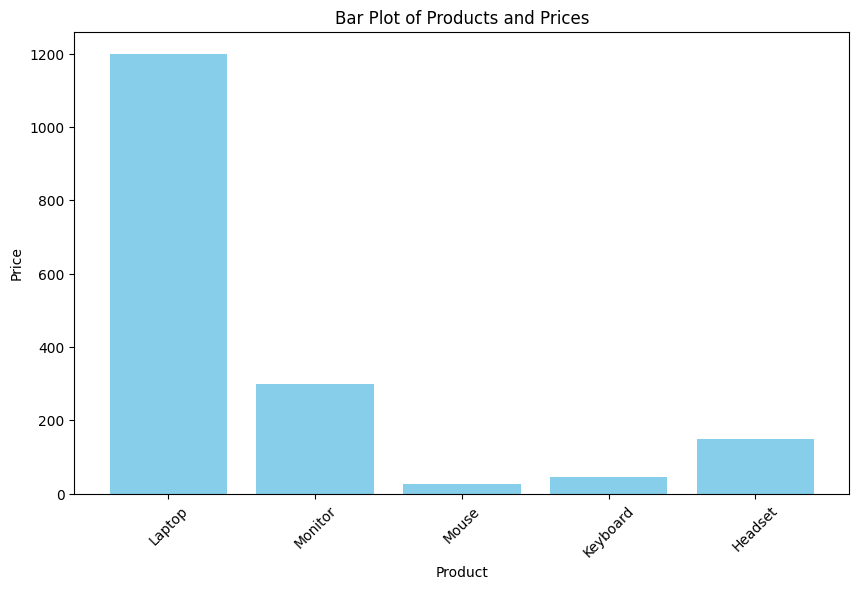

'A bar plot of products and prices has been created using `matplotlib`, with each product displayed on the x-axis and its corresponding price on the y-axis.'

In [13]:
agent.run("Create a bar plot of products and prices?")

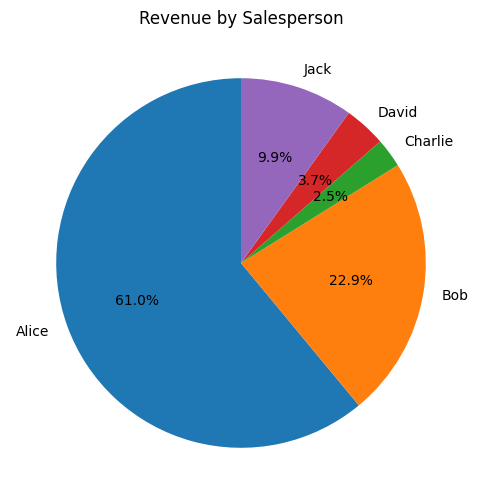

'I created a pie chart showing the revenue for each salesperson based on the product of price and units sold.'

In [17]:
agent.run("I want you take the price multiplied by units sold for each salesperson as Revenue and create a pie chart with that information")